In [1]:
import numpy as np
import matplotlib.pyplot

# importing the training data
XX = np.load("smalldata/encodings/X.npy")
k = 10            # k is a fold number
N = XX.shape[0]

train = [True]*N
train = np.array(train)
train[::k] = False
test = [False]*N
test = np.array(test)
test[::k] = True

X = XX[train,:-1]
Y = XX[train,-1]
X_test = XX[test,:-1]
Y_test = XX[test,-1]


(array([1384., 1584., 3038., 2230., 2309., 2596., 2043., 1639.,  917.,
         147.]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <BarContainer object of 10 artists>)

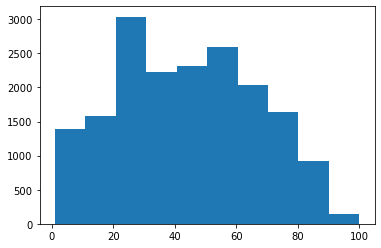

In [2]:
#age distribution
matplotlib.pyplot.hist(XX[:,-1])

In [3]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X, Y)

#MSE
np.sum(np.power(reg.predict(X_test) - Y_test,2))/Y_test.shape[0]

112.74754138364902

In [4]:
Err = np.zeros(100)
for i in range(1,101):
    try:
        Err[i-1] = np.sqrt(np.sum(np.power(reg.predict(X_test[Y_test == i]) - Y_test[Y_test == i],2))/Y_test[Y_test == i].shape[0])
    except:
        pass

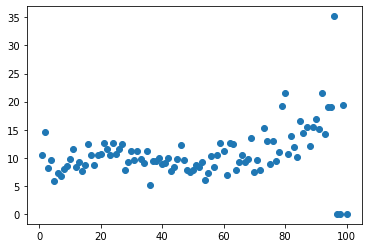

In [5]:
matplotlib.pyplot.plot(range(1,101),Err,'o')

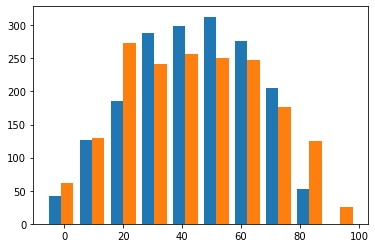

In [6]:
predicts = reg.predict(X_test);
matplotlib.pyplot.hist((predicts,Y_test));